# Capstone Project

## Problem Statement

Solving this problem will help you to gain a basic understanding of the HR industry and also how analytics and data science are applied in practice in this domain.

## A brief understanding of the HR industry

Human resources (HR) is the division of an organization that is responsible for finding, screening, recruiting, and training job applicants, and administering employee-benefit programs.

This management is the strategic approach to the efficient management of people in any organization in a way that can help their business gain a competitive advantage. It is designed to improve employee performance in service of an employer's strategic objectives.

Understanding the Problem Statement

## In this project, you will have to put yourself in the shoes of an HR analytics expert and by leveraging the data provided, you are supposed to identify how salary is varying with respect to other considerable factors.

The dataset should be divided into test and train and you would have to use the training data to build the model and thereby apply it to test data to measure the performance and robustness of the model.

In [1]:
#importing necessary librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading datasets
df = pd.read_csv('C:\\Users\\Deepak Kumar\\Desktop\\Santhu Laptop\\Data_Science\\Capstone Project\\New_data_Set.csv')
df

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.26,4.310000,3.830000,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG


In [3]:
#Basic EDA steps, checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

In [4]:
#basic EDA step, description of data individualy
df.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,72.00000


In [5]:
#Checking null values
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          8
Months               0
Education            0
dtype: int64

In [6]:
#as we have found many null values in different columns, dropping null values from Total Sales columns as values are just 8 and that doesn't affect analysis
df.dropna(subset=['Total_Sales'], inplace=True)

In [7]:
#checking whether null values are dropped or not
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1474
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          0
Months               0
Education            0
dtype: int64

In [8]:
#now dropping null values from Base pay columns as, 23 values doesn't affect analysis
df.dropna(subset=['Base_pay'], inplace=True)

In [9]:
#parity check of null values
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay             0
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1474
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          0
Months               0
Education            0
dtype: int64

In [10]:
#As there are 1474 null values in opening balance column, we couldn't drop them as it affects the data analysis.
#Parity check
df

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.26,4.310000,3.830000,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG


As we could see blank values in total sales columns, to remove blank values, we have to replace them with null value

In [11]:
#to replace blank values with any other values, we have to fill those values with null i.e NaN
df.replace(r'\s+', np.nan, regex=True)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.8,0,NaN
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,NaN
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.9,0,NaN
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.26,4.310000,3.830000,18.75,19,0,NaN
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,NaN,293.838840,310.955001,117.80,NaN,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,NaN,301.311314,309.610028,118.60,NaN,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,NaN,306.040009,303.483494,118.60,NaN,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,NaN,308.579987,312.432438,118.65,NaN,72,PG


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4969 non-null   object 
 1   Business        4969 non-null   int64  
 2   Dependancies    4969 non-null   object 
 3   Calls           4969 non-null   object 
 4   Type            4969 non-null   object 
 5   Billing         4969 non-null   object 
 6   Rating          4969 non-null   object 
 7   Age             4969 non-null   int64  
 8   Salary          4969 non-null   float64
 9   Base_pay        4969 non-null   float64
 10  Bonus           4969 non-null   float64
 11  Unit_Price      4969 non-null   float64
 12  Volume          4969 non-null   int64  
 13  openingbalance  3495 non-null   float64
 14  closingbalance  4969 non-null   float64
 15  low             4969 non-null   float64
 16  Unit_Sales      4969 non-null   float64
 17  Total_Sales     4969 non-null   o

As we could see, there are no null values are counted because of data type even though we had replcaed with NaN
So we have to change the datatype string into integer

In [13]:
#dataype conversion
df['Total_Sales'] = pd.to_numeric(df['Total_Sales'],errors = 'coerce')

In [14]:
#checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4969 non-null   object 
 1   Business        4969 non-null   int64  
 2   Dependancies    4969 non-null   object 
 3   Calls           4969 non-null   object 
 4   Type            4969 non-null   object 
 5   Billing         4969 non-null   object 
 6   Rating          4969 non-null   object 
 7   Age             4969 non-null   int64  
 8   Salary          4969 non-null   float64
 9   Base_pay        4969 non-null   float64
 10  Bonus           4969 non-null   float64
 11  Unit_Price      4969 non-null   float64
 12  Volume          4969 non-null   int64  
 13  openingbalance  3495 non-null   float64
 14  closingbalance  4969 non-null   float64
 15  low             4969 non-null   float64
 16  Unit_Sales      4969 non-null   float64
 17  Total_Sales     4961 non-null   f

In [15]:
#checking for number of null values
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay             0
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1474
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          8
Months               0
Education            0
dtype: int64

In [16]:
#dropping null values by single coloumn - droppingof blank values we had found and replaced with null values
df.dropna(subset=['Total_Sales'], inplace=True)

In [17]:
#parity check for null values
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay             0
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1466
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          0
Months               0
Education            0
dtype: int64

In [18]:
# business column is categorical value so we need to change business into string
df.Business = df.Business.astype('object')

In [19]:
#dataframe
df

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.0000,2035.60000,254.450000,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.80,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.1200,2279.24800,284.906000,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.6500,2358.66000,294.832500,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.90,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.1200,2450.04800,306.256000,4.350000,66130600,4.26,4.310000,3.830000,18.75,19.00,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.0000,2498.00000,312.250000,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,Male,0,No,Yes,Month-to-month,No,Yes,70,165120.6282,66048.25127,8256.031410,309.089996,337100,NaN,177.669998,305.799988,116.60,8496.70,72,PG
4988,Female,0,No,Yes,Two year,No,No,70,165132.4859,66052.99437,8256.624295,309.920013,410100,NaN,171.559998,304.000000,116.75,8529.50,72,PG
4989,Female,0,Yes,Yes,Month-to-month,No,No,70,167621.0992,72278.72000,8381.054960,310.000000,547600,NaN,174.259995,305.290009,116.80,8564.75,72,PG
4990,Male,0,No,Yes,Month-to-month,No,No,70,168974.5280,61235.51239,8448.726400,312.500000,317200,NaN,223.960007,307.399994,116.85,8672.45,72,PG


As there are 1466 null values in the opinening balance column, we coudn't drop them as it can affect the analysis. 
So when I gone thorugh each columns of data, I found that opening balance and closing balance are literally equal.
So I decided to replace null values of opening balance with closing balance values, which doesn't affect the analysis.


In [20]:
#replacing null values of opening balance with values of closing values.
df["openingbalance"].fillna(df["closingbalance"], inplace=True)
df

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.0000,2035.60000,254.450000,3.770000,21226600,3.750000,3.760000,3.650000,18.25,18.80,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.1200,2279.24800,284.906000,3.740000,10462800,3.850000,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.6500,2358.66000,294.832500,3.890000,18761000,4.230000,4.290000,3.720000,18.70,18.90,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.1200,2450.04800,306.256000,4.350000,66130600,4.260000,4.310000,3.830000,18.75,19.00,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.0000,2498.00000,312.250000,4.340000,26868200,4.790000,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,Male,0,No,Yes,Month-to-month,No,Yes,70,165120.6282,66048.25127,8256.031410,309.089996,337100,177.669998,177.669998,305.799988,116.60,8496.70,72,PG
4988,Female,0,No,Yes,Two year,No,No,70,165132.4859,66052.99437,8256.624295,309.920013,410100,171.559998,171.559998,304.000000,116.75,8529.50,72,PG
4989,Female,0,Yes,Yes,Month-to-month,No,No,70,167621.0992,72278.72000,8381.054960,310.000000,547600,174.259995,174.259995,305.290009,116.80,8564.75,72,PG
4990,Male,0,No,Yes,Month-to-month,No,No,70,168974.5280,61235.51239,8448.726400,312.500000,317200,223.960007,223.960007,307.399994,116.85,8672.45,72,PG


In [21]:
#description of catogorical features
df.describe( include= ['object'])

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Education
count,4961,4961,4961,4961,4961,4961,4961,4961
unique,2,2,2,2,3,2,2,4
top,Male,0,No,Yes,Month-to-month,Yes,No,PG
freq,2504,4166,3500,4502,2755,2934,3651,2944


Here we get to know that how many categorical vlaues we have in the dataset for each column.

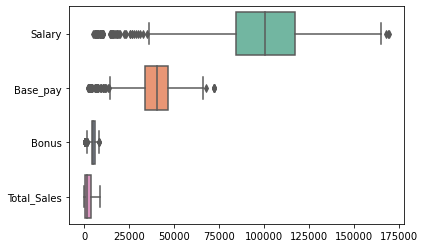

In [22]:
#checking for outliers
df_1 = df[['Salary','Base_pay','Bonus','Total_Sales']]
df_2 = df[['Unit_Price','openingbalance','closingbalance','low','Unit_Sales',]]
ax = sns.boxplot(data=df_1, orient="h", palette="Set2")

In the above graph, we could that there are outliers for Salary and Bonus but I do not like to replace outliers for Salary or Bonus columns as we need to work that part

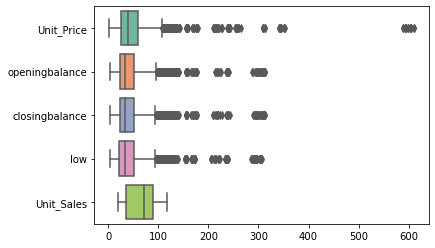

In [23]:
ax = sns.boxplot(data=df_2, orient="h", palette="Set2")

In the above graph we can see many outliers but right now I am not going to make any changes as these values might get us insigts

In [24]:
#saving cleaned dataset for future process like data sets for tableau or sql
df.to_csv('cleaned.csv') 

# Checking each categorical column individualy with salary column

This process involves comparing each categorical value of the column so that we get to know which factors are affecting salary component

## Gender

   Gender  Salary
0  Female    2457
1    Male    2504


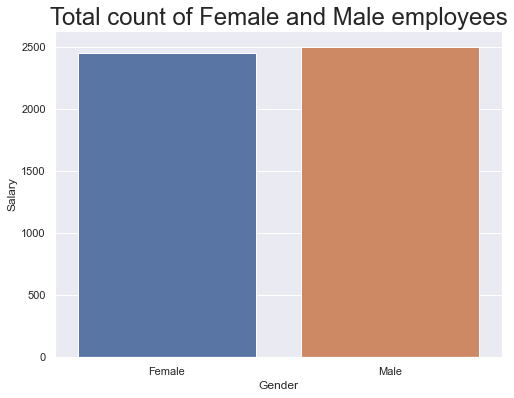

In [25]:
#Number of female and male
gender_wise = df.groupby(('Gender')).agg({'Salary': 'count'})


#Grouped data will be in array format, have to change in to coulmns
gender_wise = gender_wise.reset_index()
print(gender_wise)

#ploting bar graph through seaborn

x= gender_wise.Gender
y= gender_wise.Salary

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.barplot(x,y).set_title('Total count of Female and Male employees', fontsize = 24)

   Gender    Salary
0  Female  99421.00
1    Male 100485.51


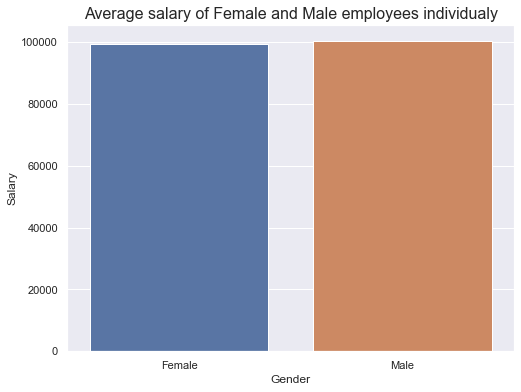

In [26]:
#Total salary of female and male individualy
gender_wise = df.groupby(('Gender')).agg({'Salary': 'mean'})

#As numerical numbers are high, total sales will be shown in exponential format, so we need to change the format of float and assign only 2 decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Grouped data will be in array format, have to change in to coulmns
gender_wise = gender_wise.reset_index()
print(gender_wise)

#ploting bar graph through seaborn

x= gender_wise.Gender
y= gender_wise.Salary

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.barplot(x,y).set_title('Average salary of Female and Male employees individualy', fontsize = 16)

## Business

   Business    Salary
0         0 100082.01
1         1  99310.03
   Business  Salary
0         0    4166
1         1     795


Text(0.5, 1.0, 'Count of employess')

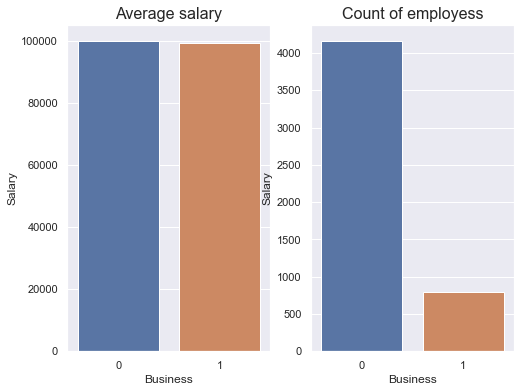

In [27]:
#grouping who has business
business_sum_wise = df.groupby(('Business')).agg({'Salary': 'mean'})
business_count_wise = df.groupby(('Business')).agg({'Salary': 'count'})

#Grouped data will be in array format, have to change in to coulmns
business_sum_wise = business_sum_wise.reset_index()
print(business_sum_wise)
business_count_wise = business_count_wise.reset_index()
print(business_count_wise)
#ploting bar graph through seaborn
sns.set()

fig, axes = plt.subplots(1, 2)


sns.barplot(x='Business',y='Salary', data=business_sum_wise, ax=axes[0]).set_title('Average salary', fontsize = 16)
sns.barplot(x='Business',y='Salary', data=business_count_wise,ax=axes[1]).set_title('Count of employess', fontsize = 16)


By seeing this graph we can say that employees who doesn't business are having more salary than who have business

## Dependaries

  Dependancies    Salary
0           No  99753.02
1          Yes 100450.08
  Dependancies  Salary
0           No    3500
1          Yes    1461


Text(0.5, 1.0, 'Count of employees')

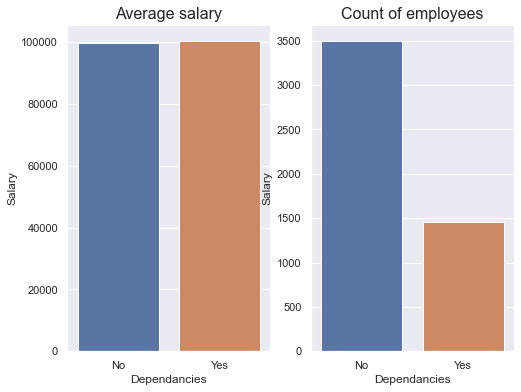

In [28]:
#grouping who has dependeries
depend_sum_wise = df.groupby(('Dependancies')).agg({'Salary': 'mean'})
depend_count_wise = df.groupby(('Dependancies')).agg({'Salary': 'count'})

#Grouped data will be in array format, have to change in to coulmns
depend_sum_wise = depend_sum_wise.reset_index()
print(depend_sum_wise)
depend_count_wise = depend_count_wise.reset_index()
print(depend_count_wise)
#ploting bar graph through seaborn
sns.set()

fig, axes = plt.subplots(1, 2)


sns.barplot(x='Dependancies',y='Salary', data=depend_sum_wise, ax=axes[0]).set_title('Average salary', fontsize = 16)
sns.barplot(x='Dependancies',y='Salary', data=depend_count_wise,ax=axes[1]).set_title('Count of employees', fontsize = 16)


Nothing much to concentrate on this feature. As this doesn't give us any notebale information regarding salary

## Calls

  Calls    Salary
0    No  97608.68
1   Yes 100197.85
  Calls  Salary
0    No     459
1   Yes    4502


Text(0.5, 1.0, 'Count of employees')

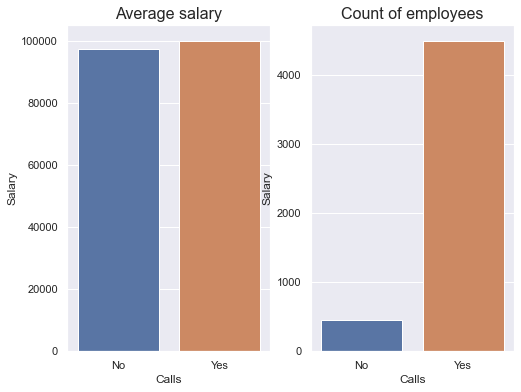

In [29]:
#grouping who has calling facility 
call_sum_wise = df.groupby(('Calls')).agg({'Salary': 'mean'})
call_count_wise = df.groupby(('Calls')).agg({'Salary': 'count'})

#Grouped data will be in array format, have to change in to coulmns
call_sum_wise = call_sum_wise.reset_index()
print(call_sum_wise)
call_count_wise = call_count_wise.reset_index()
print(call_count_wise)
#ploting bar graph through seaborn
sns.set()

fig, axes = plt.subplots(1, 2)


sns.barplot(x='Calls',y='Salary', data=call_sum_wise, ax=axes[0]).set_title('Average salary', fontsize = 16)
sns.barplot(x='Calls',y='Salary', data=call_count_wise,ax=axes[1]).set_title('Count of employees', fontsize = 16)

As we could find nothing noticable from the graph

## Type

             Type    Salary
0  Month-to-month  99941.14
1        One year  98961.57
2        Two year 100853.79
             Type  Salary
0  Month-to-month    2755
1        One year    1019
2        Two year    1187


Text(0.5, 1.0, 'Count of employees')

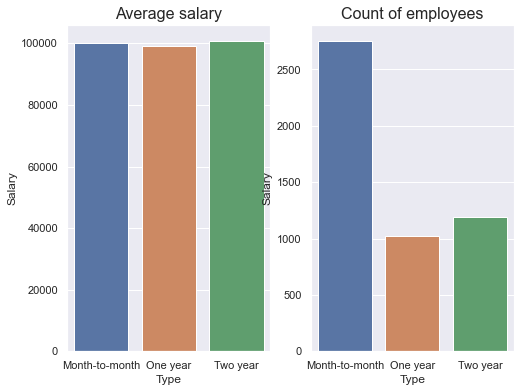

In [30]:
#grouping by type of salary they recieve
type_sum_wise = df.groupby(('Type')).agg({'Salary': 'mean'})
type_count_wise = df.groupby(('Type')).agg({'Salary': 'count'})

#Grouped data will be in array format, have to change in to coulmns
type_sum_wise = type_sum_wise.reset_index()
print(type_sum_wise)
type_count_wise = type_count_wise.reset_index()
print(type_count_wise)
#ploting bar graph through seaborn
sns.set()

fig, axes = plt.subplots(1, 2)


sns.barplot(x='Type',y='Salary', data=type_sum_wise, ax=axes[0]).set_title('Average salary', fontsize = 16)
sns.barplot(x='Type',y='Salary', data=type_count_wise,ax=axes[1]).set_title('Count of employees', fontsize = 16)

As these sum and count graphs are similar to some extent, we cannot come to conclusion of anything unusual

## Billing

  Billing    Salary
0      No  99835.27
1     Yes 100043.30
  Billing  Salary
0      No    2027
1     Yes    2934


Text(0.5, 1.0, 'Count of employees')

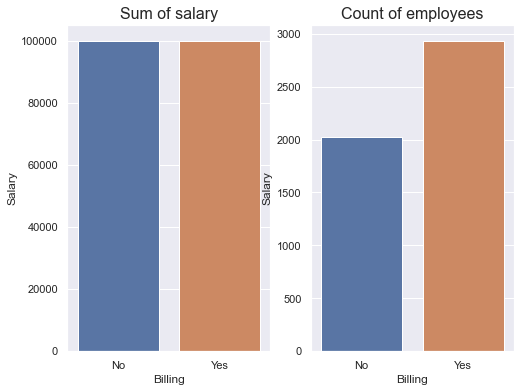

In [31]:
#grouping by billing
billing_sum_wise = df.groupby(('Billing')).agg({'Salary': 'mean'})
billing_count_wise = df.groupby(('Billing')).agg({'Salary': 'count'})

#Grouped data will be in array format, have to change in to coulmns
billing_sum_wise = billing_sum_wise.reset_index()
print(billing_sum_wise)
billing_count_wise = billing_count_wise.reset_index()
print(billing_count_wise)
#ploting bar graph through seaborn
sns.set()

fig, axes = plt.subplots(1, 2)


sns.barplot(x='Billing',y='Salary', data=billing_sum_wise, ax=axes[0]).set_title('Sum of salary', fontsize = 16)
sns.barplot(x='Billing',y='Salary', data=billing_count_wise,ax=axes[1]).set_title('Count of employees', fontsize = 16)

No unusual increase or decrease in the graph

## Rating

  Rating    Salary
0     No  99847.77
1    Yes 100266.34
  Rating  Salary
0     No    3651
1    Yes    1310


Text(0.5, 1.0, 'Count of employees')

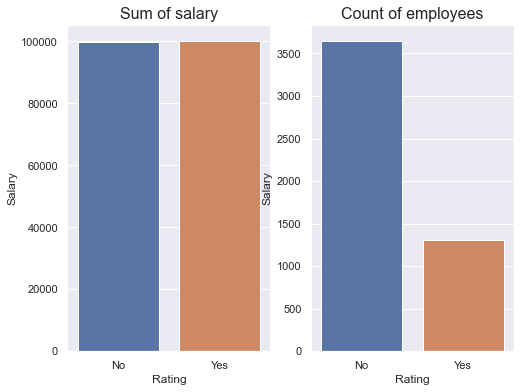

In [32]:
#grouping who has rated by manager 
rating_sum_wise = df.groupby(('Rating')).agg({'Salary': 'mean'})
rating_count_wise = df.groupby(('Rating')).agg({'Salary': 'count'})

#Grouped data will be in array format, have to change in to coulmns
rating_sum_wise = rating_sum_wise.reset_index()
print(rating_sum_wise)
rating_count_wise = rating_count_wise.reset_index()
print(rating_count_wise)
#ploting bar graph through seaborn
sns.set()

fig, axes = plt.subplots(1, 2)


sns.barplot(x='Rating',y='Salary', data=rating_sum_wise, ax=axes[0]).set_title('Sum of salary', fontsize = 16)
sns.barplot(x='Rating',y='Salary', data=rating_count_wise,ax=axes[1]).set_title('Count of employees', fontsize = 16)

We dont find any unusual trend or graph

## Age 

In [33]:
#grouping age wise salary
age_sum_wise = df.groupby(('Age')).agg({'Salary': 'mean'})

age_sum_wise = age_sum_wise.reset_index()
age_sum_wise.sort_values(by='Age')


,Age,Salary
0,18,43731.13
1,19,71153.08
2,20,96012.72
3,21,87108.08
4,22,89907.46
...,...,...
60,79,125349.81
61,80,103920.78
62,82,103981.47
63,85,103984.54


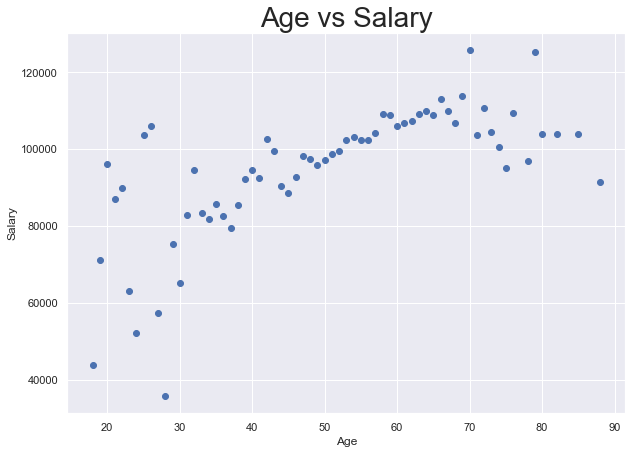

In [36]:
#ploting line graph
bins = age_sum_wise['Salary']

fig, ax = plt.subplots(figsize =(10, 7))
ax.scatter(age_sum_wise['Age'], bins)
plt.title('Age vs Salary', fontsize=28)
plt.xlabel('Age')
plt.ylabel('Salary')
# Show plot
plt.show()

Here we could come to conculsion that employees are having more salary upon their ages, may be experience

## Months of Experience

In [ ]:
#grouping age wise salary
month_sum_wise = df.groupby(('Months')).agg({'Salary': 'mean'})

month_sum_wise = month_sum_wise.reset_index()
month_sum_wise.sort_values(by='Months')

#ploting line graph
line = month_sum_wise['Salary']

fig, ax = plt.subplots(figsize =(16, 10))
ax.plot(month_sum_wise['Months'], line)
plt.title('Experience vs Salary', fontsize=28)
plt.xlabel('Months of experience')
plt.ylabel('Salary')
# Show plot
plt.show()

This graph shows salary depends on experience they hold, and tenure

## Education

In [ ]:
#grouping who has rated by manager 
edu_sum_wise = df.groupby(('Education')).agg({'Salary': 'mean'})
edu_count_wise = df.groupby(('Education')).agg({'Salary': 'count'})

#Grouped data will be in array format, have to change in to coulmns
edu_sum_wise = edu_sum_wise.reset_index()
print(edu_sum_wise)
edu_count_wise = edu_count_wise.reset_index()
print(edu_count_wise)
#ploting bar graph through seaborn
sns.set()
sns.set(rc={'figure.figsize':(16,10)})
fig, axes = plt.subplots(1, 2)


sns.barplot(x='Education',y='Salary', data=edu_sum_wise, ax=axes[0]).set_title('Average  salary', fontsize = 16)
sns.barplot(x='Education',y='Salary', data=edu_count_wise,ax=axes[1]).set_title('Count of employees', fontsize = 16)

Here we get to know that Education impact on salary

# Finally we get to know that salary depend on Tenure, Education and sometimes on Age too. 

## Check the number of variables that are normally distributed & explain

In [ ]:
#scatter plot to check correlation between Experince and salary
sns.scatterplot('Months','Salary',data=df)

In [ ]:
#scatter plot to check correlation between Age and salary
sns.scatterplot('Age','Salary',data=df)

In [ ]:
#scatter plot to check correlation between Volume and salary
sns.scatterplot('Volume','Salary',data=df)

In [ ]:
#scatter plot to check correlation between Total Sales and salary
sns.scatterplot('Total_Sales','Salary',data=df)

In [ ]:
# we can use pairplot to create correlation graph rather than ploting scatter plot for each columns
sns.pairplot(df)

## Spearman correlation

In [ ]:
#correlation between the columns 
heatmap = df.corr(method='spearman').round(2)
#print(heatmap)

In [ ]:
#plotting heatmap for the variables
sns.heatmap(heatmap,cmap="YlGnBu",fmt='.2f', annot=True,vmin=-1, vmax=1)


#### Spearman rank has correlation between -1 to +1. 

Here,

+1: Perfectly increasing relationship

+0.8: Strong increasing relationship

+0.2: Weak increasing relationship

0: Non relation

-0.2: Weak decreasing relationship

-0.8: Strong decreasing relationship

-1: Perfectly decreasing relationship

From this correlation model we can select few columns for machine learing model, those columns should not to have correlation value between -0.60 to +0.60 with Salary column.  

#### Machine learning model
Low, Unit_Sales ,Total_Sales, Months, Base_Pay, Bonus, Unit_Price are highly correlated with salary column


#### Model Creation

 Gender, Business, Dependencies, Type, Billing, Rating, Education have significant p-value, so we will consider it for model creation 

### Splitting the dependent variable

In [ ]:
y=df['Salary']
y

### Splitting the independent variables

In [ ]:
X=df[['low', 'Unit_Sales' ,'Total_Sales', 'Months', 'Base_pay', 'Bonus', 'Unit_Price','Gender', 'Business', 
     'Dependancies', 'Type', 'Billing', 'Rating','Education']]
X

## Creating dummy values of numerical values

In [ ]:
Xg=pd.get_dummies(X['Gender'], prefix='Gender',columns=['M'],drop_first=True)
X=X.join(Xg)

In [ ]:
Xb=pd.get_dummies(X['Business'], prefix='Business',columns=['1'],drop_first=True)
X=X.join(Xb)

In [ ]:
Xd=pd.get_dummies(X['Dependancies'], prefix='Dependancies',columns=['Yes'],drop_first=True)
X=X.join(Xd)

In [ ]:
Xt=pd.get_dummies(X['Type'], prefix='Type',columns=['Two_year','One_year'],drop_first=True)
X=X.join(Xt)

In [ ]:
Xb1=pd.get_dummies(X['Billing'], prefix='Billing',columns=['Yes'],drop_first=True)
X=X.join(Xb1)

In [ ]:
Xr=pd.get_dummies(X['Rating'], prefix='Rating',columns=['No'],drop_first=True)
X=X.join(Xr)

In [ ]:
Xt=pd.get_dummies(X['Education'], prefix='Edu',columns=['Intermediate', 'Graduation', 'PG'],drop_first=True)
X=X.join(Xt)

### Now we will drop unnessaccery column

In [ ]:
X.drop(['Gender', 'Business', 'Dependancies', 'Type', 'Billing', 'Rating','Education'], axis = 1, inplace=True)

In [ ]:
X

In [ ]:
#renaming column names as those contain space.

X.rename(columns={'Edu_High School or less':'Edu_High_School_less','Type_One year':'Type_One_Year',
                   'Type_Two year':'Type_Two_Year'},inplace=True)

In [ ]:
X

### Splitting the Dataset into test and train

In [ ]:
#importing the test_train_split to split the data by taking rendom sample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=1)

###  Linear Regression 

As the data is continous I prefer Linear Regression method to build a prediction model

In [ ]:
#Selecting Linear Regression
l_model = LinearRegression()
l_model.fit(X_train,y_train)

In [ ]:
#Getting the perdiction from the train data using linear model
y_pred=l_model.predict(X_train)

In [ ]:
#Getting the RMSE

rmse = mean_squared_error(y_train,y_pred)
r2 = r2_score(y_train,y_pred)
print('---------------- For the Train Dataset--------------')
print('RMSE:{}'.format(rmse))
print('R2:{}'.format(r2))

In [ ]:
#Getting the perdiction from the test data using linear model

y_test_pred=l_model.predict(X_test)

In [ ]:
rmse = mean_squared_error(y_test,y_test_pred)
r2 = r2_score(y_test,y_test_pred)
print('---------------- For the Test Dataset--------------')
print('RMSE:{}'.format(rmse))
print('R2:{}'.format(r2))

### Result

1. RMSE score of both train and test data are almost equal but test data score is slightly more than train data score

2. R2 score of test and train data is 1.

In [ ]:
y.shape

In [ ]:
y_pred.shape